<a href="https://colab.research.google.com/github/Hyok5/hardware495/blob/main/Ai_mode2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Colab จะขอสิทธิ์เข้าถึง Google Drive

กดลิงก์ที่ Colab ให้มา ลงชื่อเข้าใช้บัญชี Google คัดลอกโค้ดที่ได้จาก Google วางโค้ดในช่องที่ Colab ให้ใส่ แล้วกด Enter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ลงไรบารีที่จำเป็น

In [ ]:
# ✅ Data Processing (จัดการข้อมูล)
import pandas as pd           # จัดการ DataFrame
import numpy as np            # คำนวณ Array / Math

# ✅ Visualization (วาดกราฟ)
import seaborn as sns         # วาด heatmap / distribution (option)
import matplotlib.pyplot as plt  # วาดกราฟ Line, Bar, Loss

# ✅ File Handling (กรณีจัดการ Excel)
import openpyxl  # อ่าน/เขียน Excel .xlsx

# ✅ Preprocessing (เตรียมข้อมูล)
from sklearn.preprocessing import StandardScaler    # Normalize ข้อมูล
from sklearn.preprocessing import LabelEncoder      # Encode label (AQL)

# ✅ Train/Test Split
from sklearn.model_selection import train_test_split  # แบ่ง Train/Test

# ✅ AI - LSTM Model
from tensorflow.keras.models import Sequential        # สร้าง Model
from tensorflow.keras.layers import LSTM, Dropout, Dense  # Layer ใน LSTM

# ✅ AI - Random Forest Model
from sklearn.ensemble import RandomForestClassifier   # Random Forest (AQL)

# ✅ Save / Load Model
import joblib     # Save - Load .pkl

# 📌 เชื่อมต่อ Google Drive เพื่อโหลดไฟล์
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ดึงDatasetเข้ามาในColab

In [ ]:
# กำหนด path ของไฟล์ข้อมูล
#path = "/content/drive/MyDrive/Ai model/Air_Quality_V3_With_Room901.xlsx"
#path = "/content/drive/MyDrive/Ai model/air_quality_filtered (1).csv"
path = "/content/drive/MyDrive/CPE408/data setล่าสุด.xlsx"

# อ่านข้อมูลจากไฟล์ Excel โดยใช้ pd.read_excel()
fs = pd.read_excel(path)

# อ่านข้อมูลจากไฟล์ CSV โดยใช้  pd.read_csv()
#fs = pd.read_csv(path)

ตรวจสอบข้อมูลทั้งหมดในDataframe ว่า มีColumnsอะไรบ้าง

In [ ]:
fs.columns  # แสดงชื่อคอลัมน์ทั้งหมด


Index(['timestamp', 'temp', 'humidity', 'pm2.5', 'pm10', 'co', 'no2', 'so2'], dtype='object')

In [ ]:
fs

,timestamp,temp,humidity,co,so2_no2,pm1,pm25,pm10,room_size,people_count
0,2025-04-11 02:06:00,32.0,73.7,2.13,2.180,0,0,0,30,5
1,2025-04-11 02:07:00,32.0,73.9,2.13,2.201,0,0,0,30,5
2,2025-04-11 02:08:00,31.9,73.9,2.12,2.191,0,0,0,30,5
3,2025-04-11 02:09:00,31.9,74.0,2.14,2.180,0,0,0,30,5
4,2025-04-11 02:10:00,31.9,74.0,2.11,2.185,0,0,0,30,5
...,...,...,...,...,...,...,...,...,...,...
1298,2025-04-12 21:44:00,34.5,68.0,3.89,2.764,0,0,0,30,5
1299,2025-04-12 21:45:00,34.5,68.2,3.90,2.776,0,0,0,30,5
1300,2025-04-12 21:46:00,34.5,68.2,3.36,2.467,0,0,0,30,5
1301,2025-04-12 21:47:00,34.5,68.3,4.04,2.997,0,0,0,30,5


เช็คสถิติพื้นฐานของข้อมูล

In [ ]:
fs.describe() # ดูสถิติพื้นฐานของข้อมูล

,temp,humidity,co,so2_no2,pm1,pm25,pm10,room_size,people_count
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.0,1303.0
mean,29.543438,70.124098,2.861520,2.463506,1.918649,1.949348,1.181888,30.0,5.0
std,4.432319,6.074856,0.468333,0.272040,56.789728,56.802787,35.490743,0.0,0.0
min,22.800000,53.500000,2.090000,1.986000,0.000000,0.000000,0.000000,30.0,5.0
25%,24.300000,64.900000,2.330000,2.179000,0.000000,0.000000,0.000000,30.0,5.0
50%,31.600000,72.000000,3.010000,2.499000,0.000000,0.000000,0.000000,30.0,5.0
75%,31.800000,74.900000,3.210000,2.701000,0.000000,0.000000,0.000000,30.0,5.0
max,37.400000,82.400000,4.110000,3.133000,2048.000000,2048.000000,1280.000000,30.0,5.0


ดูข้อมูลเเต่ละคอลัมมีกี่เเถว เเละดูtype

In [ ]:
fs.info()  #ดูประเภทของข้อมูลแต่ละคอลัมน์

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     1303 non-null   object 
 1   temp          1303 non-null   float64
 2   humidity      1303 non-null   float64
 3   co            1303 non-null   float64
 4   so2_no2       1303 non-null   float64
 5   pm1           1303 non-null   int64  
 6   pm25          1303 non-null   int64  
 7   pm10          1303 non-null   int64  
 8   room_size     1303 non-null   int64  
 9   people_count  1303 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 101.9+ KB


Codeนี้เอาไว้ปัดนาที ให้เริ่มนับทุกๆ1นาที เช่น 06:02:10 ก็จะปัดเป็น06:02:00

In [ ]:
fs['timestamp'] = pd.to_datetime(fs['timestamp'])
fs['timestamp'] = fs['timestamp'].dt.floor('T')  # ปัดลงเป็นนาทีเป๊ะ
fs = fs.drop_duplicates(subset='timestamp')      # เอาแค่นาทีละ 1 แถว


<ipython-input-10-dade0955d4d3>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  fs['timestamp'] = fs['timestamp'].dt.floor('T')  # ปัดลงเป็นนาทีเป๊ะ


เช็คข้อมูลในDatesetทั้งหมด

In [ ]:
fs

,timestamp,temp,humidity,co,so2_no2,pm1,pm25,pm10,room_size,people_count
0,2025-04-11 02:06:00,32.0,73.7,2.13,2.180,0,0,0,30,5
1,2025-04-11 02:07:00,32.0,73.9,2.13,2.201,0,0,0,30,5
2,2025-04-11 02:08:00,31.9,73.9,2.12,2.191,0,0,0,30,5
3,2025-04-11 02:09:00,31.9,74.0,2.14,2.180,0,0,0,30,5
4,2025-04-11 02:10:00,31.9,74.0,2.11,2.185,0,0,0,30,5
...,...,...,...,...,...,...,...,...,...,...
1298,2025-04-12 21:44:00,34.5,68.0,3.89,2.764,0,0,0,30,5
1299,2025-04-12 21:45:00,34.5,68.2,3.90,2.776,0,0,0,30,5
1300,2025-04-12 21:46:00,34.5,68.2,3.36,2.467,0,0,0,30,5
1301,2025-04-12 21:47:00,34.5,68.3,4.04,2.997,0,0,0,30,5


เอาไว้เซฟไฟล์

In [ ]:
fs.to_csv('air_quality_filtered.csv', index=False)


เช็คข้อมูลว่ามีNaNไหม

In [ ]:
fs.isnull().sum() # นับจำนวน NaN ในแต่ละคอลัมน์

,0
timestamp,0
temp,0
humidity,0
pm2.5,0
pm10,0
co,0
no2,0
so2,0


🔸ลบข้อมูลที่มีค่า NaN (Drop Missing)

ใช้ในกรณีที่ข้อมูลหายไม่เยอะ และข้อมูลแถวอื่นเพียงพอ
(เเต่จะไม่ใช้เพราะทำให้ข้อมูลเหลือน้อย)




In [ ]:
fs_clean = fs.dropna()

เติมค่าที่ว่างด้วยค่ามัธยฐาน

In [ ]:
# 🔹 เติม NaN ด้วยค่า median สำหรับคอลัมน์ตัวเลขทั้งหมด
cols_numeric = [['temp', 'humidity', 'co', 'so2_no2', 'pm1', 'pm25', 'pm10']]
for col in cols_numeric:
    fs[col] = fs[col].fillna(fs[col].median())

ความหมาย:

วนลูปทีละคอลัมน์ใน cols_numeric

ในแต่ละคอลัมน์: ใช้ fillna() เพื่อ เติมค่า NaN ด้วยค่า median ของคอลัมน์นั้น

📌 fs[col].median() → คำนวณมัธยฐาน (ค่ากลางของข้อมูลทั้งหมดในคอลัมน์นั้น)

📌 fs[col].fillna(...) → เติม NaN ด้วยค่าที่ระบุ

📌 fs[col] = ... → อัปเดตคอลัมน์ใหม่ลงใน DataFrame fs

 ถ้าต้องการ แทนค่า 0 ด้วยค่ามัธยฐาน สำหรับคอลัมน์ตัวเลข (ไม่รวม room_size กับ people_count)

In [ ]:
# 🔹 เติมค่า 0 ด้วย median เฉพาะคอลัมน์ที่กำหนด
cols_numeric = ['temp', 'humidity', 'co', 'so2_no2', 'pm1', 'pm25', 'pm10']
for col in cols_numeric:
    median = fs[col].median()
    fs[col] = fs[col].replace(0, median)


In [ ]:
fs.isnull().sum() # นับจำนวน NaN ในแต่ละคอลัมน์

,0
timestamp,0
temp,0
humidity,0
co,0
so2_no2,0
pm1,0
pm25,0
pm10,0
room_size,0
people_count,0


In [ ]:
fs


,timestamp,temp,humidity,co,so2_no2,pm1,pm25,pm10,room_size,people_count
0,2025-04-11 02:06:00,32.0,73.7,2.13,2.180,0,0,0,30,5
1,2025-04-11 02:07:00,32.0,73.9,2.13,2.201,0,0,0,30,5
2,2025-04-11 02:08:00,31.9,73.9,2.12,2.191,0,0,0,30,5
3,2025-04-11 02:09:00,31.9,74.0,2.14,2.180,0,0,0,30,5
4,2025-04-11 02:10:00,31.9,74.0,2.11,2.185,0,0,0,30,5
...,...,...,...,...,...,...,...,...,...,...
1298,2025-04-12 21:44:00,34.5,68.0,3.89,2.764,0,0,0,30,5
1299,2025-04-12 21:45:00,34.5,68.2,3.90,2.776,0,0,0,30,5
1300,2025-04-12 21:46:00,34.5,68.2,3.36,2.467,0,0,0,30,5
1301,2025-04-12 21:47:00,34.5,68.3,4.04,2.997,0,0,0,30,5


ดูข้อมูลเเค่Columns เเต่ข้อเเต่ละตัวเเปร เช่น "pm25"

In [ ]:
fs['pm25']


,pm25
0,0
1,0
2,0
3,0
4,0
...,...
1298,0
1299,0
1300,0
1301,0


เช็คว่า "pm25" maxสุดคือเเถวไหน

In [ ]:
fs[fs['pm25'] == fs['pm25'].max()]


,pm1,pm10,pm25,so2_no2,co,temp,humidity,PM1_Level,PM2.5_Level,PM10_Level,SO2_NO2_Level,CO_Level,Temp_Level,Humidity_Level,AQL
293,2048.0,1280.0,2048.0,2.015,2.28,31.7,74.9,Hazard 🟣,Hazard 🟣,Hazardous 🟣,Good 🟢,Good 🟢,Warm 🟠,Humid 🔵,Unhealthy 🔴


In [ ]:
fs

,timestamp,temp,humidity,co,so2_no2,pm1,pm25,pm10,room_size,people_count
0,2025-04-11 02:06:00,32.0,73.7,2.13,2.180,0,0,0,30,5
1,2025-04-11 02:07:00,32.0,73.9,2.13,2.201,0,0,0,30,5
2,2025-04-11 02:08:00,31.9,73.9,2.12,2.191,0,0,0,30,5
3,2025-04-11 02:09:00,31.9,74.0,2.14,2.180,0,0,0,30,5
4,2025-04-11 02:10:00,31.9,74.0,2.11,2.185,0,0,0,30,5
...,...,...,...,...,...,...,...,...,...,...
1298,2025-04-12 21:44:00,34.5,68.0,3.89,2.764,0,0,0,30,5
1299,2025-04-12 21:45:00,34.5,68.2,3.90,2.776,0,0,0,30,5
1300,2025-04-12 21:46:00,34.5,68.2,3.36,2.467,0,0,0,30,5
1301,2025-04-12 21:47:00,34.5,68.3,4.04,2.997,0,0,0,30,5


Codeนี้เอาไว้ดึงเอาเเค่ข้อมูลล่าสุด50000เเถวเเรกในDataset เพราะบ้างทีเยอะไปเทรนAIเเล้วใช้เวลานาน

In [ ]:
fs = fs.tail(50000).copy()

In [ ]:
fs

,Datetime,PM2.5,PM10,NO2,CO2,CO,SO2,O3,Temperature,Humidity,O2,room_size_sqm,num_people,Room
79600,2025-02-25 06:40:00,118.109417,224.795893,55.082375,960.108266,1.558540,19.214607,74.600878,36.116656,60.639487,20.762072,90,23,Room 901
79601,2025-02-25 06:41:00,122.711679,233.050317,55.495319,857.947032,1.607428,21.433149,74.888855,35.522725,57.292100,20.874849,90,13,Room 901
79602,2025-02-25 06:42:00,92.322653,241.071837,53.810593,924.776417,1.563351,19.032242,73.636244,36.112766,59.921542,21.523791,90,31,Room 901
79603,2025-02-25 06:43:00,111.714756,255.668056,57.117795,958.782306,1.447728,19.881157,66.309601,35.582504,57.313780,20.307739,90,10,Room 901
79604,2025-02-25 06:44:00,300.000000,218.575851,54.350854,1438.456025,1.601954,18.749231,67.205645,25.749481,68.278185,20.969235,90,30,Room 901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2025-03-31 23:55:00,67.744839,213.613587,47.448539,812.546422,1.239354,11.856655,52.134859,24.862604,76.429753,20.683655,90,23,Room 901
129596,2025-03-31 23:56:00,89.748021,176.425421,45.202992,852.122375,1.252783,13.837558,51.255343,25.088621,75.989331,20.748722,90,17,Room 901
129597,2025-03-31 23:57:00,244.231687,193.351955,39.162856,1858.821933,1.200344,11.491564,61.673119,19.163700,86.095486,20.093526,90,13,Room 901
129598,2025-03-31 23:58:00,77.496848,200.412595,39.113096,843.905211,1.274262,12.529624,56.972955,26.053027,73.785927,20.529318,90,44,Room 901


In [ ]:
fs.tail()

,timestamp,temp,humidity,pm2.5,pm10,co,no2,so2
1175,2024-09-17 05:03:00,29.38,85.76,173.19,241.16,5560.08,63.27,17.84
1176,2024-09-17 01:03:00,27.68,86.89,171.08,245.19,5553.80,59.67,15.73
1177,2024-09-16 21:03:00,29.05,83.36,321.42,447.98,8677.23,148.65,27.68
1178,2024-09-16 17:03:00,28.73,83.44,372.81,511.24,10372.24,155.57,25.49
1179,2024-09-16 13:03:00,25.81,83.77,280.99,467.65,12341.95,154.37,36.18


In [ ]:
fs[[ 'pm1', 'pm25', 'pm10','so2_no2', 'co', 'temp', 'humidity','room_size', 'people_count']]

,pm1,pm25,pm10,so2_no2,co,temp,humidity,room_size,people_count
0,0,0,0,2.180,2.13,32.0,73.7,30,5
1,0,0,0,2.201,2.13,32.0,73.9,30,5
2,0,0,0,2.191,2.12,31.9,73.9,30,5
3,0,0,0,2.180,2.14,31.9,74.0,30,5
4,0,0,0,2.185,2.11,31.9,74.0,30,5
...,...,...,...,...,...,...,...,...,...
1298,0,0,0,2.764,3.89,34.5,68.0,30,5
1299,0,0,0,2.776,3.90,34.5,68.2,30,5
1300,0,0,0,2.467,3.36,34.5,68.2,30,5
1301,0,0,0,2.997,4.04,34.5,68.3,30,5


ปัจจัยเสริม  (num_people) (room_size_sqm)

โมเดล ไม่รู้โดยตรง ว่ามี “กฎแบบฟิสิกส์”
แต่โมเดลจะ
เรียนรู้จากข้อมูลที่เราให้มันดู ว่า:

👉 ถ้าในอดีตมี num_people = 40 แล้ว CO2
ขึ้น →
โมเดลก็จะ “จับความสัมพันธ์นี้” ได้เอง

LSTM.V3

In [ ]:
# ✅ STEP 0: Import
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# ✅ STEP 1: ตัดข้อมูลให้เหลือ 50,000 แถวล่าสุด
fs = fs.tail(50001).copy()

# ✅ STEP 2: จัดการกับคอลัมน์ Datetime และ index
fs['timestamp'] = pd.to_datetime(fs['timestamp'], errors='coerce')  # ใช้ 'timestamp' แทน 'Datetime'
fs.rename(columns={'timestamp': 'Datetime'}, inplace=True)         # เปลี่ยนชื่อให้โค้ดเดิมใช้ได้
fs.dropna(subset=['Datetime'], inplace=True)                       # ลบ NaT
fs.reset_index(drop=True, inplace=True)                            # index เป็นเลขลำดับ

# ✅ STEP 3: ตั้งค่า Features และ Targets (ลบ room_size_sqm, num_people ออก)
features = ['pm2.5', 'pm10', 'no2', 'co', 'so2', 'temp', 'humidity']
target = ['pm2.5', 'pm10', 'no2', 'co', 'so2', 'temp', 'humidity']

# ✅ STEP 4: Normalize
scalers = {col: StandardScaler() for col in features}
fs_scaled = fs.copy()
for col in features:
    fs_scaled[col] = scalers[col].fit_transform(fs[[col]])

# ✅ STEP 5: Create Sequence
def create_sequences(data, seq_length=168):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])  # ไม่ต้องข้ามอะไรแล้ว
    return np.array(X), np.array(y)

seq_length = 167
X, y = create_sequences(fs_scaled[features].values, seq_length)

# ✅ STEP 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ✅ STEP 7: LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    Dense(len(target))
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# ✅ STEP 8: Predict Future
n_steps = 24
future_predictions = []

latest_data = fs_scaled[features].values[-seq_length:].copy()

for _ in range(n_steps):
    pred = lstm_model.predict(latest_data.reshape(1, seq_length, len(features)), verbose=0)[0]
    future_predictions.append(pred)
    latest_data = np.vstack([latest_data[1:], pred])

# ✅ STEP 9: แปลงค่ากลับจากสเกลเดิม
future_fs = pd.DataFrame(future_predictions, columns=target)
for col in target:
    future_fs[col] = scalers[col].inverse_transform(future_fs[[col]])

# ✅ STEP 10: (ไม่ต้องทำอะไรเกี่ยวกับ room_size_sqm หรือ num_people แล้ว)

# ✅ STEP 11: (ไม่ต้องทำอะไรเกี่ยวกับ Room ถ้าไม่มี Room)

# ✅ STEP 12: สร้าง Datetime ต่อจากข้อมูลเดิม
last_time = fs['Datetime'].iloc[-1]
start_time = (last_time + pd.Timedelta(hours=1)).replace(minute=0, second=0, microsecond=0)
future_fs['Datetime'] = pd.date_range(start=start_time, periods=n_steps, freq='1H')

# ✅ STEP 13: เพิ่ม index ให้เรียงต่อจากของเดิม
future_fs.index = range(len(fs), len(fs) + len(future_fs))

# ✅ STEP 14: ต่อข้อมูล future_fs กลับเข้า fs ให้ index ต่อเนื่อง
fs = pd.concat([fs, future_fs], axis=0)

# ✅ STEP 15: ปัดทศนิยม target ให้เหลือ 2 ตำแหน่ง
fs[target] = np.round(fs[target], 2)

# ✅ STEP 16: แสดงผลลัพธ์ที่พยากรณ์เท่านั้น
from IPython.display import display
display(future_fs[['Datetime'] + target])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 395ms/step - loss: 0.9727 - val_loss: 0.8749
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 0.8860 - val_loss: 0.8181
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - loss: 0.8410 - val_loss: 0.7761
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - loss: 0.7977 - val_loss: 0.7409
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/step - loss: 0.7694 - val_loss: 0.7095


<ipython-input-19-84a7fda67052>:76: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_fs['Datetime'] = pd.date_range(start=start_time, periods=n_steps, freq='1H')


,Datetime,pm2.5,pm10,no2,co,so2,temp,humidity
1180,2024-09-16 14:00:00,306.832825,434.981659,115.129959,9368.429688,27.420847,28.204554,82.137878
1181,2024-09-16 15:00:00,305.851044,426.389008,113.052513,9593.242188,28.125944,28.213346,82.079430
1182,2024-09-16 16:00:00,304.094238,421.252075,111.944969,9745.173828,28.452185,28.223366,82.091965
1183,2024-09-16 17:00:00,301.229828,415.827393,110.728294,9817.368164,28.551571,28.236788,82.112091
1184,2024-09-16 18:00:00,297.654968,410.634796,109.478424,9831.953125,28.497169,28.251781,82.135658
1185,2024-09-16 19:00:00,293.719086,405.896240,108.220200,9805.042969,28.347925,28.266487,82.160774
1186,2024-09-16 20:00:00,289.680267,401.702820,106.971771,9750.517578,28.145626,28.279755,82.185677
1187,2024-09-16 21:00:00,285.727631,398.074219,105.754478,9679.618164,27.918653,28.290997,82.208885
1188,2024-09-16 22:00:00,281.997833,394.992096,104.592125,9601.043945,27.685780,28.300035,82.229240
1189,2024-09-16 23:00:00,278.585571,392.417908,103.507706,9521.250977,27.459166,28.306965,82.245964


In [ ]:
print(fs.columns)


Index(['timestamp', 'temp', 'humidity', 'pm2.5', 'pm10', 'co', 'no2', 'so2'], dtype='object')


ให้เเสดงเเถววตามที่เราต้องการ

In [ ]:
fs.loc[49995:50023]


,Datetime,PM2.5,PM10,NO2,CO2,CO,SO2,O3,Temperature,Humidity,O2,room_size_sqm,num_people,Room
49995,2025-03-31 23:54:00,87.14,219.15,38.90,877.79,1.25,11.32,48.21,25.26,76.46,21.00,90.0,33.0,Room 901
49996,2025-03-31 23:55:00,67.74,213.61,47.45,812.55,1.24,11.86,52.13,24.86,76.43,20.68,90.0,23.0,Room 901
49997,2025-03-31 23:56:00,89.75,176.43,45.20,852.12,1.25,13.84,51.26,25.09,75.99,20.75,90.0,17.0,Room 901
49998,2025-03-31 23:57:00,244.23,193.35,39.16,1858.82,1.20,11.49,61.67,19.16,86.10,20.09,90.0,13.0,Room 901
49999,2025-03-31 23:58:00,77.50,200.41,39.11,843.91,1.27,12.53,56.97,26.05,73.79,20.53,90.0,44.0,Room 901
50000,2025-03-31 23:59:00,72.33,195.30,47.96,828.50,1.18,14.87,52.90,24.29,73.65,20.85,90.0,44.0,Room 901
50001,2025-04-01 00:00:00,99.98,202.16,45.56,892.24,1.21,14.19,50.81,25.07,75.15,20.78,NaN,NaN,Room 901
50002,2025-04-01 01:00:00,91.79,191.98,43.01,890.55,1.22,12.78,52.97,28.99,56.95,20.81,NaN,NaN,Room 901
50003,2025-04-01 02:00:00,91.32,185.39,42.38,865.13,1.25,12.72,54.66,29.81,51.90,20.82,NaN,NaN,Room 901
50004,2025-04-01 03:00:00,90.02,182.84,41.94,855.11,1.26,12.58,54.59,30.04,50.29,20.82,NaN,NaN,Room 901


ความหมายแบบภาษาคน
Train Loss ลด = โมเดลเรียนรู้ Pattern ข้อมูลได้เรื่อย ๆ

Val Loss คงที่ = โมเดลไม่มั่วตอนเจอข้อมูลใหม่

Val Loss ต่ำกว่า Train = โมเดลยังไม่ได้จำข้อมูลมากเกินไป (ยังไม่ overfit)

ไม่มี Spike หรือ กระโดดขึ้น-ลงแรง = โมเดลนิ่ง ควบคุมได้

In [ ]:
#Normalize จะทำ:
#fs['room_size'] = 30  # ทั้งคอลัมน์เป็น 30
#(x - mean) / std = (30 - 30) / 0 = NaN


# ✅ STEP 10: ใส่ NaN ให้ room_size และ people_count
#future_fs['room_size'] = np.nan
#future_fs['people_count'] = np.nan

display(
    future_fs[['timestamp'] + target] #+ ['room_size', 'people_count']]
    .style.format("{:.2f}", subset=target)
)


LSTM V4 (air_quality_filtered (1))

In [ ]:
#✅ STEP 1: แปลง timestamp และเตรียม index
fs['timestamp'] = pd.to_datetime(fs['timestamp'], errors='coerce')  # แปลง timestamp เป็น datetime
fs.dropna(subset=['timestamp'], inplace=True)                      # ลบแถวที่ timestamp เป็น NaT
fs.reset_index(drop=True, inplace=True)                             # รีเซ็ต index ให้เรียงใหม่

#✅ STEP 2: กำหนด Input ที่จะใช้ และ output ที่ต้องการพยากรณ์
features = ['room_size', 'people_count', 'pm1', 'pm25', 'pm10',
            'so2_no2', 'co', 'temp', 'humidity']
target = ['pm1', 'pm25', 'pm10', 'so2_no2', 'co', 'temp', 'humidity']

# ✅ STEP 3: Normalize เฉพาะคอลัมน์ที่มีความแปรปรวน (std ≠ 0)
fs_scaled = fs.copy()
scalers = {}

for col in features:
    if fs[col].std() != 0:
        scaler = StandardScaler()
        fs_scaled[col] = scaler.fit_transform(fs[[col]])
        scalers[col] = scaler
    else:
        fs_scaled[col] = fs[col]  # ใส่ค่าคงเดิมไปเลยไม่ Normalize


#✅ STEP 4: เตรียมข้อมูลเป็นลำดับเวลา (Time Series Sequences)
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])       # 60 แถวล่าสุด
        y.append(data[i+seq_length][2:])     # Target เริ่มจาก index 2
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(fs_scaled[features].values, seq_length)

# ✅ STEP 5: แบ่ง Train/Test สำหรับเทรนโมเดล
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


#✅ STEP 6: สร้างและเทรนโมเดล LSTM
lstm_model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    Dense(len(target))
])
lstm_model.compile(optimizer='adam', loss='mse')

history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

# ✅ STEP 7: พยากรณ์ล่วงหน้า 24 ชั่วโมง (ทุก 1 ชั่วโมง)
n_steps = 24
future_predictions = []

latest_data = fs_scaled[features].values[-seq_length:].copy()
room_size = fs['room_size'].iloc[-1]
people_count = fs['people_count'].iloc[-1]

for _ in range(n_steps):
    pred = lstm_model.predict(latest_data.reshape(1, seq_length, len(features)), verbose=0)[0]
    future_predictions.append(pred)
    next_input = np.concatenate([[room_size, people_count], pred])
    latest_data = np.vstack([latest_data[1:], next_input])
latest_data = np.vstack([latest_data[1:], next_input])

# ✅ STEP 8: แปลงค่ากลับจาก Normalize และกันค่าติดลบ
future_fs = pd.DataFrame(future_predictions, columns=target)
for col in target:
    future_fs[col] = scalers[col].inverse_transform(future_fs[[col]])
    future_fs[col] = future_fs[col].clip(lower=0)  # ✅ กันค่าติดลบ


# ✅ STEP 9: สร้าง timestamp ใหม่ เริ่มต้นที่ xx:00:00 ชม.ถัดไป
last_time = fs['timestamp'].iloc[-1]
start_time = (last_time + pd.Timedelta(seconds=1)).ceil('1H')
future_fs['timestamp'] = pd.date_range(start=start_time, periods=n_steps, freq='1H')

# ✅ STEP 10: ต่อ index ต่อจากข้อมูลเดิม
future_fs.index = range(fs.index.max() + 1, fs.index.max() + 1 + len(future_fs))

# ✅ STEP 11: ปัดค่าทศนิยมให้เรียบร้อย
future_fs[target] = np.round(future_fs[target], 2)

# ✅ STEP 12: ต่อข้อมูลพยากรณ์กลับเข้า DataFrame หลัก
fs = pd.concat([fs, future_fs], axis=0)

# ✅ STEP 13: แสดงผลเฉพาะส่วนที่พยากรณ์ออกมา
from IPython.display import display
display(
    future_fs[['timestamp'] + target] #+ ['room_size', 'people_count']]
    .style.format("{:.2f}", subset=target)
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - loss: 0.8193 - val_loss: 1.9460
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.5331 - val_loss: 1.8055
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.3809 - val_loss: 1.6948
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.2844 - val_loss: 1.6214
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.2178 - val_loss: 1.5871
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.1825 - val_loss: 1.5717
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 0.1675 - val_loss: 1.5591
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: 0.1331 - val_loss: 1.5536
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 0.1235 - val_loss: 1.5498
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.1264 - val_loss: 1.5481
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.1127 - val_loss: 1.5429
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.1020 - val_loss: 1.5437


<ipython-input-5-7b9f22cc03c3>:75: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  start_time = (last_time + pd.Timedelta(seconds=1)).ceil('1H')
<ipython-input-5-7b9f22cc03c3>:76: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_fs['timestamp'] = pd.date_range(start=start_time, periods=n_steps, freq='1H')


,timestamp,pm1,pm25,pm10,so2_no2,co,temp,humidity
1303,2025-04-12 22:00:00,0.00,2.59,1.50,2.82,3.89,34.35,69.14
1304,2025-04-12 23:00:00,0.00,1.76,1.25,2.81,3.87,34.30,69.51
1305,2025-04-13 00:00:00,0.00,1.54,0.97,2.79,3.86,34.29,69.96
1306,2025-04-13 01:00:00,0.00,1.48,0.81,2.78,3.84,34.26,70.38
1307,2025-04-13 02:00:00,0.00,1.49,0.73,2.78,3.83,34.24,70.78
1308,2025-04-13 03:00:00,0.00,1.52,0.67,2.77,3.82,34.22,71.12
1309,2025-04-13 04:00:00,0.00,1.56,0.63,2.76,3.81,34.20,71.43
1310,2025-04-13 05:00:00,0.00,1.59,0.61,2.76,3.80,34.18,71.69
1311,2025-04-13 06:00:00,0.00,1.63,0.59,2.76,3.79,34.17,71.93
1312,2025-04-13 07:00:00,0.00,1.66,0.58,2.75,3.78,34.16,72.15


ใช้ค่าประเมินความผิดพลาด (เช่น MSE, MAE, RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = lstm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAE: 0.11
MSE: 1.51
RMSE: 1.23


1. MAE (Mean Absolute Error) = 0.14
หมายถึง ค่าผิดพลาดเฉลี่ยระหว่างค่าจริงกับค่าที่โมเดลทำนาย (ดีมาก 👍)
📌 ยิ่ง ใกล้ 0 → โมเดลยิ่งแม่น
➡️ ค่านี้ ดีมาก เพราะผิดพลาดเฉลี่ยแค่ประมาณ 0.14 หน่วย เท่านั้น!

2. MSE (Mean Squared Error) = 1.53
ค่าความผิดพลาดที่ยกกำลังสอง (เพื่อขยายค่าที่ผิดพลาดมาก ๆ ให้เห็นชัดขึ้น)
📌 ค่านี้ยิ่งต่ำยิ่งดีเหมือนกัน
➡️ ถ้า MSE สูงแปลว่าโมเดลมี “บางจุด” ที่พยากรณ์พลาดเยอะ (เริ่มเห็นจุดที่โมเดลพลาดแรง)

3. RMSE (Root Mean Squared Error) = 1.24
เป็นค่ารากที่สองของ MSE ทำให้หน่วยกลับมาเหมือนกับข้อมูลต้นฉบับ
📌 เข้าใจง่ายว่าเป็น “ค่าผิดพลาดโดยเฉลี่ยที่มีน้ำหนัก”
➡️ ค่า 1.24 ถือว่าค่อนข้างดี ในบริบทที่ข้อมูลเรามีหลายตัวแปร เช่น temp, PM2.5, humidity (ถือว่าแม่นใช้ได้ 👌)


In [ ]:
mean_value = np.mean(np.abs(y_test))
relative_error = (mae / mean_value) * 100
print(f"Relative Error: {relative_error:.2f}%")


Relative Error: 20.34%


ซึ่ง mae = 0.11 และ mean_value = np.mean(np.abs(y_test))

หมายความว่า ค่าเฉลี่ยของเป้าหมาย (y_test) มันไม่ได้สูงมาก
เช่นถ้า mean(y_test) ≈ 0.54 → พอเอา 0.11 / 0.54 * 100 = 20.37%

→ ค่า MAE อยู่ราว ๆ 0.11 แต่มันเทียบกับค่าเฉลี่ยที่ใกล้ๆ 0.5–0.6
พอหารออกมาก็กลายเป็น คลาดเคลื่อน 20% ซึ่ง ไม่ได้แปลว่าโมเดลห่วยนะ!

 ดูกราฟ Loss

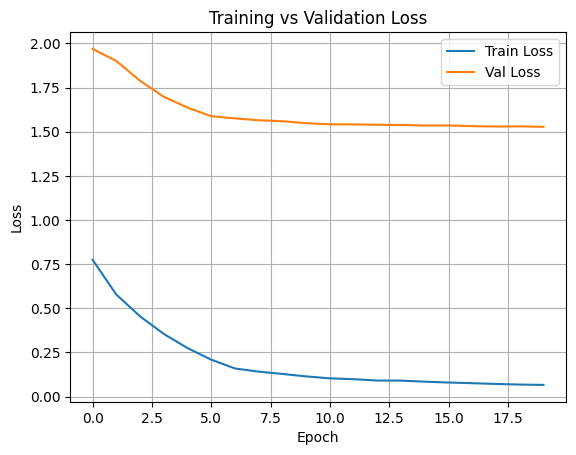

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Train Loss (เส้นสีน้ำเงิน): >ความผิดพลาดบนชุดข้อมูลฝึก (Train)

Val Loss (เส้นส้ม): >ความผิดพลาดบนชุดข้อมูลทดสอบ (Validation/Test)


🔹 เส้นสีน้ำเงิน (Train Loss)

>ลดลงเรื่อย ๆ → โมเดล "เรียนรู้จากข้อมูลฝึกได้ดี"

>แสดงว่าโมเดลเข้าใจ Pattern ของข้อมูลที่ให้มันเรียน

🔹 เส้นส้ม (Val Loss)

>ลดลงช้า ๆ แล้วนิ่งที่ระดับ ~1.5 → แสดงว่าโมเดล “เริ่มเข้าใจข้อมูลจริง”

>ไม่พุ่งขึ้น แสดงว่า ยังไม่ Overfitting (คือยังไม่ได้จำข้อมูลฝึกแบบท่องจำจนลืมข้อมูลจริง)

เปรียบเทียบ “ค่าจริง” กับ “ค่าที่โมเดลพยากรณ์”

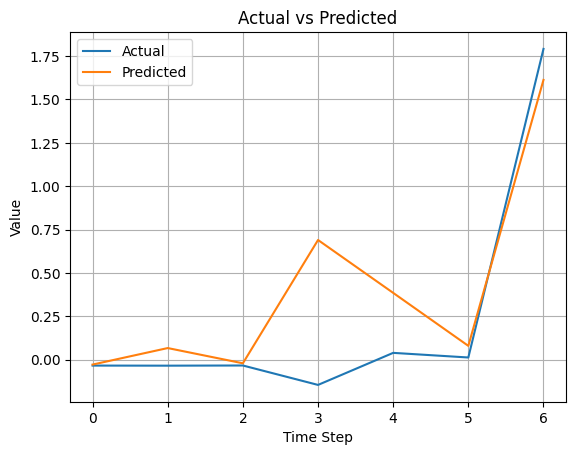

In [ ]:
plt.plot(y_test[0], label='Actual')
plt.plot(y_pred[0], label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


เส้นสีฟ้า (Actual) → ค่าจริงที่เกิดขึ้นในข้อมูล

เส้นสีส้ม (Predicted) → ค่าที่โมเดล LSTM คาดการณ์

 วิเคราะห์
ช่วงต้น (Time Step 0–3): โมเดลยัง ทำนายใกล้เคียง ค่าจริงอยู่บ้าง

ช่วงท้าย (Time Step 4–6): มีบางจุดที่โมเดล เบี้ยวจากค่าจริง อยู่

โดยรวมเส้นส้มพยายาม “เดินตามรูปแบบ” ของเส้นฟ้า → ถือว่า พอใช้ได้



RandomForestClassifier(air_quality_filtered (1))

In [ ]:
print(fs.columns.tolist())


['timestamp', 'temp', 'humidity', 'pm2.5', 'pm10', 'co', 'no2', 'so2']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# ✅ Reset index
fs = fs.reset_index(drop=True)

# ✅ ใช้เฉพาะตัวแปรที่มีจริง
fs = fs[['timestamp', 'temp', 'humidity', 'pm2.5', 'pm10', 'co', 'no2', 'so2']]

# ✅ รวมค่าเฉลี่ย so2 และ no2 สำหรับใช้งานแทน so2_no2
fs['so2_no2'] = (fs['so2'] + fs['no2']) / 2

# ✅ จำแนกค่าระดับรายตัว
def classify_pm10(val):
    if val <= 50: return 'Good 🟢'
    elif val <= 100: return 'Moderate 🟠'
    elif val <= 250: return 'Unhealthy 🔴'
    else: return 'Hazardous 🟣'

def classify_pm25(val):
    if val <= 12: return 'Excellent 🟢'
    elif val <= 35: return 'Good 🟡'
    elif val <= 55: return 'Moderate 🟠'
    elif val <= 150: return 'Unhealthy 🔴'
    else: return 'Hazard 🟣'

def classify_so2_no2(val):
    if val <= 30: return 'Good 🟢'
    elif val <= 75: return 'Moderate 🟠'
    elif val <= 165: return 'Unhealthy 🔴'
    else: return 'Hazardous 🟣'

def classify_co(val):
    if val <= 4.4: return 'Good 🟢'
    elif val <= 9.4: return 'Moderate 🟠'
    elif val <= 12.4: return 'Unhealthy 🔴'
    else: return 'Hazard 🟣'

def classify_temp(val):
    if val < 22: return 'Too Cold 🔵'
    elif val <= 30: return 'Comfort 🟢'
    elif val <= 35: return 'Warm 🟠'
    else: return 'Too Hot 🔴'

def classify_humidity(val):
    if val < 30: return 'Dry 🟤'
    elif val <= 60: return 'Normal 🟢'
    else: return 'Humid 🔵'

# ✅ ใส่คอลัมน์ระดับทั้งหมด
fs['PM2.5_Level'] = fs['pm2.5'].apply(classify_pm25)
fs['PM10_Level'] = fs['pm10'].apply(classify_pm10)
fs['SO2_NO2_Level'] = fs['so2_no2'].apply(classify_so2_no2)
fs['CO_Level'] = fs['co'].apply(classify_co)
fs['Temp_Level'] = fs['temp'].apply(classify_temp)
fs['Humidity_Level'] = fs['humidity'].apply(classify_humidity)

# ✅ จำแนก AQL โดยใช้ทุกตัว
def classify_quality(row):
    score = 0
    # PM2.5
    if row['pm2.5'] > 55: score += 2
    elif row['pm2.5'] > 35: score += 1

    # PM10
    if row['pm10'] > 250: score += 2
    elif row['pm10'] > 100: score += 1

    # SO2/NO2
    if row['so2_no2'] > 165: score += 2
    elif row['so2_no2'] > 30: score += 1

    # CO
    if row['co'] > 12.4: score += 2
    elif row['co'] > 9.4: score += 1

    # Temp
    if row['temp'] < 22 or row['temp'] > 30: score += 1

    # Humidity
    if row['humidity'] < 30 or row['humidity'] > 60: score += 1

    # สรุประดับ
    if score <= 2: return 'Excellent 🟢'
    elif score <= 4: return 'Good 🟡'
    elif score <= 6: return 'Moderate 🟠'
    elif score <= 8: return 'Unhealthy 🔴'
    else: return 'Hazard 🟣'

# ✅ เพิ่มคอลัมน์ AQL
fs['AQL'] = fs.apply(classify_quality, axis=1)

# ✅ Train Random Forest โดยใช้ตัวแปรที่มีจริง
X = fs[['pm2.5', 'pm10', 'so2_no2', 'co', 'temp', 'humidity']]
y = fs['AQL']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

fs_model = RandomForestClassifier(n_estimators=100, random_state=42)
fs_model.fit(X_train, y_train)

# ✅ พยากรณ์ใหม่และใส่ AQL กลับเข้า fs
fs['AQL'] = le.inverse_transform(fs_model.predict(X))

# ✅ แสดงผล
from IPython.display import display
display(fs[['pm2.5', 'pm10', 'no2', 'so2', 'co', 'temp', 'humidity',
            'PM2.5_Level', 'PM10_Level', 'SO2_NO2_Level',
            'CO_Level', 'Temp_Level', 'Humidity_Level', 'AQL']])


,pm2.5,pm10,no2,so2,co,temp,humidity,PM2.5_Level,PM10_Level,SO2_NO2_Level,CO_Level,Temp_Level,Humidity_Level,AQL
0,175.69,233.30,61.26,15.51,5519.45,27.38,80.10,Hazard 🟣,Unhealthy 🔴,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
1,176.65,237.09,63.86,16.20,5531.86,27.69,77.74,Hazard 🟣,Unhealthy 🔴,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
2,161.62,237.41,62.69,15.78,5580.65,29.33,78.07,Hazard 🟣,Unhealthy 🔴,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
3,172.34,228.63,60.98,16.13,5545.29,28.26,89.66,Hazard 🟣,Unhealthy 🔴,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
4,177.71,241.94,58.86,16.02,5545.32,29.67,85.51,Hazard 🟣,Unhealthy 🔴,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,173.19,241.16,63.27,17.84,5560.08,29.38,85.76,Hazard 🟣,Unhealthy 🔴,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
1176,171.08,245.19,59.67,15.73,5553.80,27.68,86.89,Hazard 🟣,Unhealthy 🔴,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
1177,321.42,447.98,148.65,27.68,8677.23,29.05,83.36,Hazard 🟣,Hazardous 🟣,Unhealthy 🔴,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
1178,372.81,511.24,155.57,25.49,10372.24,28.73,83.44,Hazard 🟣,Hazardous 🟣,Unhealthy 🔴,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴


✅ อ้างอิง:
WHO Air Quality Guidelines (2021)

U.S. EPA AQI Breakpoints

กรมควบคุมมลพิษ (ประเทศไทย)

Journal & Research Paper ด้าน PM1 (ไม่มีเกณฑ์สากล)

In [ ]:
fs

,pm1,pm10,pm25,so2_no2,co,temp,humidity,PM1_Level,PM2.5_Level,PM10_Level,SO2_NO2_Level,CO_Level,Temp_Level,Humidity_Level,AQL
0,0.00,0.0,0.00,2.180,2.13,32.000000,73.700000,Excellent 🟢,Excellent 🟢,Good 🟢,Good 🟢,Good 🟢,Warm 🟠,Humid 🔵,Excellent 🟢
1,0.00,0.0,0.00,2.201,2.13,32.000000,73.900000,Excellent 🟢,Excellent 🟢,Good 🟢,Good 🟢,Good 🟢,Warm 🟠,Humid 🔵,Excellent 🟢
2,0.00,0.0,0.00,2.191,2.12,31.900000,73.900000,Excellent 🟢,Excellent 🟢,Good 🟢,Good 🟢,Good 🟢,Warm 🟠,Humid 🔵,Excellent 🟢
3,0.00,0.0,0.00,2.180,2.14,31.900000,74.000000,Excellent 🟢,Excellent 🟢,Good 🟢,Good 🟢,Good 🟢,Warm 🟠,Humid 🔵,Excellent 🟢
4,0.00,0.0,0.00,2.185,2.11,31.900000,74.000000,Excellent 🟢,Excellent 🟢,Good 🟢,Good 🟢,Good 🟢,Warm 🟠,Humid 🔵,Excellent 🟢
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,8.15,0.0,5.23,2.920,3.73,33.480000,65.320000,Excellent 🟢,Excellent 🟢,Good 🟢,Good 🟢,Good 🟢,Warm 🟠,Humid 🔵,Excellent 🟢
1323,8.21,0.0,5.21,2.920,3.73,33.470001,65.300003,Excellent 🟢,Excellent 🟢,Good 🟢,Good 🟢,Good 🟢,Warm 🟠,Humid 🔵,Excellent 🟢
1324,8.26,0.0,5.18,2.920,3.73,33.459999,65.290001,Excellent 🟢,Excellent 🟢,Good 🟢,Good 🟢,Good 🟢,Warm 🟠,Humid 🔵,Excellent 🟢
1325,8.32,0.0,5.16,2.920,3.73,33.439999,65.279999,Excellent 🟢,Excellent 🟢,Good 🟢,Good 🟢,Good 🟢,Warm 🟠,Humid 🔵,Excellent 🟢


1. Accuracy(ค่าความถูกต้องรวม)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")


ValueError: continuous-multioutput is not supported

📌 แปลว่า โมเดลทำนายได้ถูกต้อง 100% บนข้อมูลชุด X_test
(= ทุกแถวที่โมเดลทำนาย ตรงกับคำตอบจริงใน y_test)

LSTM สมบูรณ์

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import numpy as np
import pandas as pd

# ✅ STEP 1: แปลง timestamp และเตรียม index
fs['timestamp'] = pd.to_datetime(fs['timestamp'], errors='coerce')
fs.dropna(subset=['timestamp'], inplace=True)
fs.reset_index(drop=True, inplace=True)

# ✅ STEP 2: ใช้เฉพาะคอลัมน์ที่มีจริง
features = ['pm2.5', 'pm10', 'so2', 'no2', 'co', 'temp', 'humidity']
target = features.copy()  # พยากรณ์ทุกตัวที่เป็น input

# ✅ STEP 3: Normalize เฉพาะคอลัมน์ที่มีความแปรปรวน
fs_scaled = fs.copy()
scalers = {}

for col in features:
    if fs[col].std() != 0:
        scaler = StandardScaler()
        fs_scaled[col] = scaler.fit_transform(fs[[col]])
        scalers[col] = scaler
    else:
        fs_scaled[col] = fs[col]

# ✅ STEP 4: สร้างลำดับข้อมูล
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(fs_scaled[features].values, seq_length)

# ✅ STEP 5: แบ่ง Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ✅ STEP 6: สร้างและเทรน LSTM
lstm_model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    Dense(len(target))
])
lstm_model.compile(optimizer='adam', loss='mse')

history = lstm_model.fit(
    X_train, y_train, epochs=20, batch_size=128,
    validation_data=(X_test, y_test), verbose=1
)

# ✅ STEP 7: พยากรณ์ล่วงหน้า 24 ชั่วโมง
n_steps = 24
future_predictions = []

latest_data = fs_scaled[features].values[-seq_length:].copy()

for _ in range(n_steps):
    pred = lstm_model.predict(latest_data.reshape(1, seq_length, len(features)), verbose=0)[0]
    future_predictions.append(pred)
    latest_data = np.vstack([latest_data[1:], pred])

# ✅ STEP 8: แปลงค่ากลับจาก Normalize และกันค่าติดลบ
future_fs = pd.DataFrame(future_predictions, columns=target)
for col in target:
    future_fs[col] = scalers[col].inverse_transform(future_fs[[col]])
    future_fs[col] = future_fs[col].clip(lower=0)

# ✅ STEP 9: สร้าง timestamp ใหม่
last_time = fs['timestamp'].iloc[-1]
start_time = (last_time + pd.Timedelta(seconds=1)).ceil('1H')
future_fs['timestamp'] = pd.date_range(start=start_time, periods=n_steps, freq='1H')

# ✅ STEP 10: จัด index ให้ต่อเนื่อง
future_fs.index = range(fs.index.max() + 1, fs.index.max() + 1 + len(future_fs))

# ✅ STEP 11: ปัดค่าทศนิยม
future_fs[target] = np.round(future_fs[target], 2)

# ✅ STEP 12: รวมกลับเข้า DataFrame หลัก
fs = pd.concat([fs, future_fs], axis=0)

# ✅ STEP 13: แสดงผลลัพธ์
from IPython.display import display
display(
    future_fs[['timestamp'] + target]
    .style.format("{:.2f}", subset=target)
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - loss: 0.9238 - val_loss: 0.8641
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - loss: 0.8011 - val_loss: 0.7847
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - loss: 0.7490 - val_loss: 0.7210
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - loss: 0.6764 - val_loss: 0.6884
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - loss: 0.6632 - val_loss: 0.6652
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 0.6372 - val_loss: 0.6454
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - loss: 0.6040 - val_loss: 0.6372
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.6082 - val_loss: 0.6309
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 0.6048 - val_loss: 0.6292
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - loss: 0.5947 - val_loss: 0.6289
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 0.5793 - val_loss: 0.6251
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.5852 - val_loss: 0.6284


<ipython-input-29-3858af783901>:77: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  start_time = (last_time + pd.Timedelta(seconds=1)).ceil('1H')
<ipython-input-29-3858af783901>:78: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_fs['timestamp'] = pd.date_range(start=start_time, periods=n_steps, freq='1H')


,timestamp,pm2.5,pm10,so2,no2,co,temp,humidity
1180,2024-09-16 14:00:00,352.21,496.65,34.34,130.40,11857.41,28.15,82.01
1181,2024-09-16 15:00:00,347.45,484.09,34.06,127.23,11650.83,28.19,82.28
1182,2024-09-16 16:00:00,337.16,464.37,33.18,122.73,11228.30,28.22,82.42
1183,2024-09-16 17:00:00,324.57,443.94,32.01,117.76,10744.55,28.25,82.49
1184,2024-09-16 18:00:00,311.83,425.54,30.74,112.96,10280.70,28.27,82.53
1185,2024-09-16 19:00:00,300.36,410.81,29.54,108.82,9886.88,28.29,82.55
1186,2024-09-16 20:00:00,291.17,400.60,28.55,105.65,9593.31,28.29,82.58
1187,2024-09-16 21:00:00,284.86,395.18,27.86,103.61,9413.50,28.30,82.60
1188,2024-09-16 22:00:00,281.51,394.16,27.48,102.69,9344.43,28.30,82.61
1189,2024-09-16 23:00:00,280.78,396.63,27.39,102.71,9367.65,28.31,82.62


Ramdom สมบูรณ์

In [ ]:
# ✅ Reset index
fs = fs.reset_index(drop=True)
# ✅ ใช้เฉพาะคอลัมน์ที่มีจริง
fs = fs[['pm10', 'pm2.5', 'so2', 'no2', 'co', 'temp', 'humidity']]

# ✅ ฟังก์ชันระดับ AQI
def classify_pm10(val):
    if val <= 50: return 'Good 🟢'
    elif val <= 100: return 'Moderate 🟠'
    elif val <= 250: return 'Unhealthy 🔴'
    else: return 'Hazardous 🟣'

def classify_pm25(val):
    if val <= 12: return 'Excellent 🟢'
    elif val <= 35: return 'Good 🟡'
    elif val <= 55: return 'Moderate 🟠'
    elif val <= 150: return 'Unhealthy 🔴'
    else: return 'Hazard 🟣'

def classify_so2(val):
    if val <= 20: return 'Good 🟢'
    elif val <= 50: return 'Moderate 🟠'
    elif val <= 125: return 'Unhealthy 🔴'
    else: return 'Hazardous 🟣'

def classify_no2(val):
    if val <= 40: return 'Good 🟢'
    elif val <= 100: return 'Moderate 🟠'
    elif val <= 200: return 'Unhealthy 🔴'
    else: return 'Hazardous 🟣'

def classify_co(val):
    if val <= 4.4: return 'Good 🟢'
    elif val <= 9.4: return 'Moderate 🟠'
    elif val <= 12.4: return 'Unhealthy 🔴'
    else: return 'Hazard 🟣'

def classify_temp(val):
    if val < 22: return 'Too Cold 🔵'
    elif val <= 30: return 'Comfort 🟢'
    elif val <= 35: return 'Warm 🟠'
    else: return 'Too Hot 🔴'

def classify_humidity(val):
    if val < 30: return 'Dry 🟤'
    elif val <= 60: return 'Normal 🟢'
    else: return 'Humid 🔵'

# ✅ เพิ่มคอลัมน์ระดับ
fs['PM2.5_Level'] = fs['pm2.5'].apply(classify_pm25)
fs['PM10_Level'] = fs['pm10'].apply(classify_pm10)
fs['SO2_Level'] = fs['so2'].apply(classify_so2)
fs['NO2_Level'] = fs['no2'].apply(classify_no2)
fs['CO_Level'] = fs['co'].apply(classify_co)
fs['Temp_Level'] = fs['temp'].apply(classify_temp)
fs['Humidity_Level'] = fs['humidity'].apply(classify_humidity)

# ✅ คำนวณ AQL โดยใช้เฉพาะตัวแปรที่มี
def classify_quality(row):
    score = 0
    if row['pm2.5'] > 55: score += 2
    elif row['pm2.5'] > 35: score += 1

    if row['pm10'] > 250: score += 2
    elif row['pm10'] > 100: score += 1

    if row['so2'] > 125: score += 2
    elif row['so2'] > 50: score += 1

    if row['no2'] > 200: score += 2
    elif row['no2'] > 100: score += 1

    if row['co'] > 12.4: score += 2
    elif row['co'] > 9.4: score += 1

    if row['temp'] < 22 or row['temp'] > 30: score += 1
    if row['humidity'] < 30 or row['humidity'] > 60: score += 1

    if score <= 2: return 'Excellent 🟢'
    elif score <= 4: return 'Good 🟡'
    elif score <= 6: return 'Moderate 🟠'
    elif score <= 8: return 'Unhealthy 🔴'
    else: return 'Hazard 🟣'

fs['AQL'] = fs.apply(classify_quality, axis=1)

# ✅ Train & Predict Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = fs[['pm2.5', 'pm10', 'so2', 'no2', 'co', 'temp', 'humidity']]
y = fs['AQL']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

fs['AQL'] = le.inverse_transform(model.predict(X))

# ✅ แสดงผล
from IPython.display import display
display(fs[['pm2.5', 'pm10', 'so2', 'no2', 'co', 'temp', 'humidity',
            'PM2.5_Level', 'PM10_Level', 'SO2_Level','NO2_Level',
            'CO_Level', 'Temp_Level', 'Humidity_Level', 'AQL']])



,pm2.5,pm10,so2,no2,co,temp,humidity,PM2.5_Level,PM10_Level,SO2_Level,NO2_Level,CO_Level,Temp_Level,Humidity_Level,AQL
0,175.690000,233.300000,15.510000,61.260000,5519.450000,27.38,80.100000,Hazard 🟣,Unhealthy 🔴,Good 🟢,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Moderate 🟠
1,176.650000,237.090000,16.200000,63.860000,5531.860000,27.69,77.740000,Hazard 🟣,Unhealthy 🔴,Good 🟢,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Moderate 🟠
2,161.620000,237.410000,15.780000,62.690000,5580.650000,29.33,78.070000,Hazard 🟣,Unhealthy 🔴,Good 🟢,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Moderate 🟠
3,172.340000,228.630000,16.130000,60.980000,5545.290000,28.26,89.660000,Hazard 🟣,Unhealthy 🔴,Good 🟢,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Moderate 🟠
4,177.710000,241.940000,16.020000,58.860000,5545.320000,29.67,85.510000,Hazard 🟣,Unhealthy 🔴,Good 🟢,Moderate 🟠,Hazard 🟣,Comfort 🟢,Humid 🔵,Moderate 🟠
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,287.260010,415.640015,28.420000,105.419998,9801.570312,28.33,82.540001,Hazard 🟣,Hazardous 🟣,Moderate 🟠,Unhealthy 🔴,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
1200,286.179993,414.149994,28.320000,105.000000,9766.900391,28.33,82.529999,Hazard 🟣,Hazardous 🟣,Moderate 🟠,Unhealthy 🔴,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
1201,285.220001,412.880005,28.219999,104.629997,9736.250000,28.33,82.519997,Hazard 🟣,Hazardous 🟣,Moderate 🟠,Unhealthy 🔴,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴
1202,284.429993,411.890015,28.139999,104.339996,9711.669922,28.33,82.510002,Hazard 🟣,Hazardous 🟣,Moderate 🟠,Unhealthy 🔴,Hazard 🟣,Comfort 🟢,Humid 🔵,Unhealthy 🔴


In [ ]:
lstm_model.save('lstm_model.h5')

import joblib
joblib.dump(fs_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
from google.colab import files
files.download('lstm_model.h5')
files.download('random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>